https://adventofcode.com/2018

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from itertools import cycle, islice, accumulate, dropwhile
import numpy as np
from itertools import combinations
from re import match, search
import queue
def readin(file, fn=None, pandas=False):
    def processline(line):
        line=line.rstrip('\r\n') 
        if fn is not None:
            line=fn(line)
        return line
    def to_pd(lines):
        df = pd.DataFrame(lines)
        for col in df.columns:
            try:
                df[col]=pd.to_numeric(df[col])
            except Exception as e:
                print('Error converting to numeric', e)
        return df
    with open(file) as f:
        processedlines=list(map(processline, f.readlines()))
        return processedlines if not pandas else to_pd(processedlines)

### Day1

In [ ]:
in1=readin('1.txt',int)
reduce(lambda acc, x: acc+x, in1)

In [ ]:
def notseen():
    seen={0}
    def do(x):
        if x in seen:
            return False
        seen.add(x)
        return True
    return do
next(dropwhile(notseen(), accumulate(cycle(in1), lambda acc, x: acc+x)))

### Day 2

In [ ]:
def count_2_3(word):
    cnt={}
    for ch in word:
        cnt[ch] = cnt.get(ch, 0) + 1
    return 2 in cnt.values(), 3 in cnt.values()

In [ ]:
in2=readin('2.txt')
np.array([count_2_3(w) for w in in2]).sum(axis=0).prod()

In [ ]:
def extract_common(w1, w2):
    cdiff=list(map(lambda w: w[0]!=w[1], zip(w1, w2)))
    n=sum(cdiff)
    return ''.join(w for w, c in zip(w1,cdiff) if c==False) if n == 1 else None

In [ ]:
pairs=list(combinations(in2, 2))
list(filter(lambda c:c!=None,map(lambda w:extract_common(w[0], w[1]), pairs)))

### Day 3

In [ ]:
in3=readin('3.txt', lambda l:match('#(?P<i>\d+) @ (?P<x>\d+),(?P<y>\d+): (?P<w>\d+)x(?P<h>\d+)', l).groupdict(), pandas=True)

In [ ]:
areas=np.zeros(((in3['x']+in3['w']).max(),(in3['y']+in3['h']).max()))

In [ ]:
for _,i in in3.iterrows():
    areas[i['y']:i['y']+i['h'], i['x']:i['x']+i['w']] += 1

In [ ]:
len areas[areas>1]

In [ ]:
for _,i in in3.iterrows():
    if areas[i['y']:i['y']+i['h'], i['x']:i['x']+i['w']].sum()==i['h']*i['w']:
        print(i)

### Day 4

In [ ]:
in4=readin('4.txt', fn=lambda l:match('\[(?P<dt>([^]]+))\] (?P<descr>.+)', l).groupdict(), pandas=True).sort_values('dt').reset_index(drop=True)
in4['guard']=in4['descr'].str.extract('Guard #(\d+) begins shift').ffill()
in4['min']=pd.to_numeric(in4['dt'].str[-2:])
in4

In [ ]:
asleep=in4[in4.descr=='falls asleep']
pairs=asleep.merge(in4, left_index=True, right_on=in4.index-1,suffixes=('_from','_to'))
pairs['duration']=pairs['min_to']-pairs['min_from']
pairs

In [ ]:
mostasleepguard=pairs.groupby('guard_from')['duration'].sum().sort_values(ascending=False).index[0]

In [ ]:
mostmin=pd.DataFrame([(min, len(pairs[(pairs.guard_from==mostasleepguard) & (pairs.min_from<=min) & 
                (pairs.min_to>min)]['dt_from'].str[:10].unique())) 
 for min in range(60)], columns=['min', 'cnt']).sort_values('cnt',ascending=False).iloc[0]

In [ ]:
int(mostasleepguard)* mostmin['min']

In [ ]:
mostsleepguardinmin=pd.DataFrame([(min, guard, len(pairs[(pairs.guard_from==guard) & (pairs.min_from<=min) & (pairs.min_to>min)]
                       ['dt_from'].str[:10].unique()))
              for min in range(60) 
              for guard in pairs['guard_from'].unique()], columns=['min', 'guard', 'cnt']).sort_values('cnt', ascending=False).iloc[0]

In [ ]:
int(mostsleepguardinmin.guard)*mostsleepguardinmin['min']

### Day 5

In [ ]:
in5=readin('5.txt')[0]; len(in5)

In [ ]:
def to_int(ch):
    if ch >= 'A' and ch <= 'Z':
        return ord(ch)
    if ch >= 'a' and ch <= 'z':
        return -ord(ch.upper())
    raise Exception("Unknown char", ch)
def to_char(i):
    return chr(i) if i > 0 else chr(-i).lower()

In [ ]:
in5int=np.fromiter(map(to_int, in5), int, len(in5))

In [ ]:
def react(tofold):
    can_fold = True
    while can_fold:
        fold1 = tofold.reshape(-1,2)
        fold1sum = fold1.sum(axis=1)
        fold2 = fold1[fold1sum!=0].reshape(-1)
        fold22 = fold2[1:-1].reshape(-1,2)
        fold2sum = fold22.sum(axis=1)
        fold3 = fold22[fold2sum!=0].reshape(-1)
        tofold = np.concatenate([[fold2[0]], fold3, [fold2[-1]]])
        can_fold = len(fold1sum[fold1sum==0]) > 0 or len(fold2sum[fold2sum==0])>0
    return tofold
ans1=react(in5int)

In [ ]:
len(ans1)

In [ ]:
def remove_and_react(tofold, toremove):
    tofold = tofold[(tofold!=toremove) & (tofold!=-toremove)]
    return len(react(tofold))
pd.DataFrame([(toremove, remove_and_react(ans1,toremove)) 
              for toremove in np.unique(ans1)], columns=['ch','len']).sort_values('len').iloc[:5]

### Day 6

In [ ]:
inp=np.array(readin('6.txt', lambda l: l.split(','), pandas=True).as_matrix())

In [ ]:
# Sample
inp=np.array(list(map(lambda x:list(map(int,x.split(','))),"""1, 1
1, 6
8, 3
3, 4
5, 5
8, 9""".splitlines())))

In [ ]:
mx,my=np.max(inp,axis=0)
mx,my

In [ ]:
allcoords=np.array(np.meshgrid(np.arange(mx+1), np.arange(my+1))).T.reshape(-1,2)

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
coordist=cdist(allcoords,inp, 'cityblock')

In [ ]:
nearestunit=np.argpartition(coordist,2,axis=1)[:,:2]  ## pick 2 nearest points

In [ ]:
nearestunitdists=coordist[np.arange(coordist.shape[0]).reshape(-1,1) , nearestunit.reshape(1,-1,2)].reshape(-1,2)

In [ ]:
# if both units are equally closer, assign none
twoequaldistance=nearestunitdists[:,0]==nearestunitdists[:,1]

In [ ]:
nearestunitpicked=nearestunit[:,0]

In [ ]:
nearestunitpicked[twoequaldistance]=-1

In [ ]:
nearestunitpicked=nearestunitpicked.reshape(mx+1,my+1).T

In [ ]:
toplot=nearestunitpicked.copy()
#toplot[inp[:,1],inp[:,0]]=6
plt.imshow(toplot)

In [ ]:
un,cnt=np.unique(nearestunitpicked, return_counts=True)
un,cnt

In [ ]:
for cntidx in np.argsort(-cnt):
    unitidx=un[cntidx]
    unit=inp[unitidx]
    if nearestunitpicked[0][unit[0]]==unitidx:
        print(unit, "inf to top")
        continue
    if nearestunitpicked[my][unit[0]]==unitidx:
        print(unit, 'inf to bottom')
        continue
    if nearestunitpicked[unit[1]][0]==unitidx:
        print(unit, 'inf to left')
        continue
    if nearestunitpicked[unit[1]][mx]==unitidx:
        print(unit, 'inf to right')
        continue
    print(cnt[cntidx], unit)
    break
    

In [ ]:
distsum=coordist.sum(axis=1)

In [ ]:
maxdist=10000
selectedreg=allcoords[distsum<maxdist]

In [ ]:
len(selectedreg)

In [ ]:
plt.imshow(distsum.reshape(mx+1,my+1).T)

### Day 7

In [ ]:
inp=readin('7.txt', lambda x: match('Step (\w) must be finished before step (\w) can begin\.', x).groups())
# inp=[match('Step (\w) must be finished before step (\w) can begin\.', l).groups() for l in """\
# Step C must be finished before step A can begin.
# Step C must be finished before step F can begin.
# Step A must be finished before step B can begin.
# Step A must be finished before step D can begin.
# Step B must be finished before step E can begin.
# Step D must be finished before step E can begin.
# Step F must be finished before step E can begin.""".splitlines()]
inp=np.array([(ord(a)-65, ord(b)-65) for a,b in inp], np.int8)

In [ ]:
df=pd.DataFrame(inp, columns=['to','from'])
root=df[~df['from'].isin(df['to'])]['from'].unique()[0]
root

In [ ]:
# dfs doesn't resolve ready to queue correctly based on alphabet
def dfs(df, node, seen):
    if node in seen:
        return
    seen.add(node)
    children=df[df['from']==node].sort_values('to')
    #print(node, '->', children)
    for child in children['to'].sort_values():
        yield from dfs(df, child, seen)
    yield node

In [ ]:
''.join(map(lambda x:chr(x+65), dfs(df, root, set())))

In [ ]:
##### Kahn's algorithm (need to pick next availble by alphabet rather than dfs)
indegfrom,indegfromcnt=np.unique(inp[:,1],return_counts=True)
indegfrom,indegfromcnt

In [ ]:
indeg=np.zeros(inp.max()+1, np.int8)
indeg[indegfrom]=indegfromcnt
indeg

In [ ]:
ans=np.full(inp.max()+1, -1, np.int8)

In [ ]:
for i in range(inp.max()+1):
    topick=np.argmin(~((indeg==0) & (ans==-1)))
    ans[topick]=i
    nextnodes=inp[inp[:,0]==topick][:,1]
    indeg[nextnodes]-=1

In [ ]:
ansidx=np.argsort(ans)

In [ ]:
''.join(map(lambda c:chr(65+c), ansidx))

In [ ]:
# Part 2

In [ ]:
def get_roots(inp):
    sources = inp[:,0]
    targets = inp[:,1]
    return np.unique(inp[~np.isin(sources,targets)][:,0])
def get_before(node):
    return inp[inp[:,1]==node]
def get_after(node):
    return inp[inp[:,0]==node]

In [ ]:
time = 0
worker=[{'job':-1, 'rem': -1}] * (2 if len(ansidx) < 10 else 5)
completed=[]
timeoffset = 0 if len(ansidx) < 10 else 60

In [ ]:
roots = get_roots(inp)
while len(completed)<len(ansidx):
    for i in range(len(worker)):
        if worker[i]['job']>=0:
            worker[i]['rem']-=1
            if worker[i]['rem']<0:
                completed+=[worker[i]['job']]
                worker[i]['job']=-1
    for i in range(len(worker)):
        if worker[i]['job']==-1: # worker is idle?
            # next job can be done?
            jobtopickups = np.unique(np.append(roots, inp[np.isin(inp[:,0], completed)][:,1]))
            #print (jobtopickups)
            for jobtopickup in jobtopickups:
                if jobtopickup in completed or any(w['job']==jobtopickup for w in worker):
                    continue
                waitingfor = inp[inp[:,1]==jobtopickup][:,0]
                #print(jobtopickup, waitingfor)
                if all(w in completed for w in waitingfor):
                    worker[i]={'job':jobtopickup, 'rem': timeoffset+jobtopickup}
                    break
    print(time, "".join(f'{chr(65+w["job"])}' for w in worker), 
          [w['rem'] for w in worker],
          ''.join(f'{chr(65+c)}' for c in completed))
    time+=1

In [ ]:
time-1

### Day 8

In [ ]:
inp=np.fromiter(map(int,readin('8.txt')[0].split()), np.int8)

In [ ]:
def tree(nodes, idx):
    nchild=nodes[idx]
    idx += 1
    nmetadata=nodes[idx]
    idx += 1
    result = dict(child=[], metadata=[])
    for child in range(nchild):
        c, idx = tree(nodes, idx)
        result['child'].append(c)
    result['metadata'] = nodes[idx:idx+nmetadata]
    idx+=nmetadata
    return result, idx

In [ ]:
sample=np.fromiter(map(int, '2 3 0 3 10 11 12 1 1 0 1 99 2 1 1 2'.split()),  np.int8)
tree(sample, 0)[0]

In [ ]:
t=tree(inp,0)[0];

In [ ]:
def sum_metadata(root):
    return root['metadata'].sum() + sum(sum_metadata(c) for c in root['child']) 

In [ ]:
sum_metadata(t)

In [ ]:
def value(node):
    if len(node['child'])==0:
        return node['metadata'].sum()
    ans = 0
    for m in node['metadata']:
        m-=1
        if len(node['child'])>m:
            ans += value(node['child'][m])
    return ans

In [ ]:
value(t)

### Day 9

In [ ]:
inp=readin('9.txt', lambda l:match('(?P<np>\d+) players; last marble is worth (?P<pts>\d+) points', l).groupdict())[0]
nply = int(inp['np'])
pts = int(inp['pts'])

In [ ]:
# sample
nply=9
pts=25

In [ ]:
def play(nply, pts):
    board=np.zeros(pts, np.int32)
    size=1
    curpos=0
    curp=0
    scores={}
    for i in range(1, pts+1):
        curp=(curp + 1)%(nply+1)
        if curp==0:
            curp+=1
        if i%23 != 0:
            curpos = (curpos+2)%size
            if curpos == 0:
                curpos = size
            size += 1
            board[curpos+1:size+1]=board[curpos:size]
            board[curpos] = i
        else:
            #if (curpos-7<0) and i > 1:
         #   import IPython.core.debugger as d; d.set_trace()
            curpos = (curpos - 7)%size
            scores[curp] = scores.get(curp, 0) + i + board[curpos]
            board[curpos:size-1] = board[curpos+1:size]
            size -= 1
        #print(curp,  i, board[:size])
    return scores,i
        

In [ ]:
scores,i=play(nply,pts)

In [ ]:
scores,i

In [ ]:
maxscore=max(scores.values())

In [ ]:
elf=[k for k,v in scores.items() if v==maxscore][0]


In [ ]:
from collections import deque

In [ ]:
def play(nply, pts):
    board=deque([0])
    size=1
    curpos=0
    curp=0
    scores={}
    for i in range(1, pts+1):
        curp=(curp + 1)%(nply+1)
        if curp==0:
            curp+=1
        if i%23 != 0:
            curpos = (curpos+2)%size
            if curpos == 0:
                curpos = size
            board.rotate(-1)
            board.append(i)
            size+=1
        else:
            #if (curpos-7<0) and i > 1:
         #   import IPython.core.debugger as d; d.set_trace()
            curpos = (curpos - 7)%size
            for _ in range(7):
                board.rotate(1)
            scores[curp] = scores.get(curp, 0) + i + board.pop()
            board.rotate(-1)
            size -= 1
        #print(curp,  i, board)
    return scores,i        

In [ ]:
scores,i=play(nply, pts)

In [ ]:
maxscore=max(scores.values())

In [ ]:
elf=[k for k,v in scores.items() if v==maxscore][0]


In [ ]:
# play 100 times larger
scores,i=play(nply,pts*100)
max(scores.values())

### Day 10

In [ ]:
inp=readin('10.txt',lambda l:match(
    'position=<\s*(?P<x>[\d-]+),\s*(?P<y>[\d-]+)> velocity=<\s*(?P<vx>[\d-]+),\s*(?P<vy>[\d-]+)>', l).groupdict(),pandas=True)

In [ ]:
v=inp[['vx','vy']].values
p=inp[['x','y']].values

In [ ]:
def calc_dy(p,i,v):
    np = p[:,1] + i*v[:,1]
    return np.max() - np.min()
dys=np.fromiter((calc_dy(p,i,v) for i in range(20000)), np.int32)

In [ ]:
plt.plot(dys)

In [ ]:
minsecs=np.argmin(dys)

In [ ]:
np.min(axis=0)

In [ ]:
rx,ry=[],[]
for i in range(minsecs-2, minsecs+3):
    np = p+i*v
    if not rx:
        rx=[np[:,0].min(), np[:,0].max()]
        ry=[np[:,1].min(), np[:,1].max()]
    plt.figure(figsize=(10,1.5))
    plt.scatter(np[:,0],np[:,1])
    plt.title(i)
    plt.gca().set_xlim(rx)
    plt.gca().set_ylim(ry)
    plt.gca().invert_yaxis()
    plt.show()

### Day 11

In [ ]:
inp=7672
def cells(sn):
    x=np.arange(1,301)
    xx,yy=np.meshgrid(x,x)

    rackid=xx+10
    powerid=rackid*yy
    powerid+=sn
    powerid*=rackid

    powerid=powerid // 100 % 10 - 5
    return powerid

In [ ]:
cells(8)[4,2]==4

In [ ]:
Fuel cell at  122,79, grid serial number 57: power level -5.
Fuel cell at 217,196, grid serial number 39: power level  0.
Fuel cell at 101,153, grid serial number 71: power level  4.

In [ ]:
cells(57)[78,121]==-5

In [ ]:
cells(39)[195,216]==0

In [ ]:
cells(71)[152,100]==4

In [ ]:
For grid serial number 18, the largest total 3x3 square has a top-left corner of 33,45 
(with a total power of 29); these fuel cells appear in the middle of this 5x5 region:

In [ ]:
cells(18)[44:47,32:35]

In [ ]:
For grid serial number 42, the largest 3x3 square's top-left is 21,61 
(with a total power of 30); they are in the middle of this region:a

In [ ]:
cells(42)[60:63,20:23]

In [ ]:
fuel=cells(inp)

In [ ]:
def fuel_by_size(fuel, sz):
    fueldd=np.array([fuel[y:y+sz,x:x+sz].sum() for y in range(301-sz) for x in range(301-sz)]).reshape(301-sz,301-sz)
    return np.unravel_index(fueldd.argmax(), fueldd.shape), fueldd.max()

In [ ]:
fuel_by_size(fuel,3)

In [ ]:
## part 2

In [ ]:
res=[]
for i in range(1, 301):
    res+=[(i, fuel_by_size(fuel, i))]
    print(res[-1])

### Day 12

In [ ]:
def to_num(s):
    ans=0
    for i in s:
        ans*=2
        ans+=1 if i=='#' else 0
    return ans

In [ ]:
inp="""initial state: #..#.#..##......###...###

...## => #
..#.. => #
.#... => #
.#.#. => #
.#.## => #
.##.. => #
.#### => #
#.#.# => #
#.### => #
##.#. => #
##.## => #
###.. => #
###.# => #
####. => #""".splitlines()
inp=readin('12.txt')
init=inp[0][len('initial state: '):]
rules={to_num(rule[:5]):rule[-1] for rule in inp[2:]}

In [ ]:
def evolve(s,rules):
    rule = 0
    nextidx = 0
    ans = []
    for i in range(len(s)+4):
        if i >= 5:
            rule &= 0b01111
        rule *= 2
        nextch = s[nextidx] if nextidx<len(s) else '.'
        nextidx += 1
        rule += 1 if nextch=='#' else 0
        nxt = rules.get(rule, '.')
       # print(i, f'{rule:05b}', nxt)
        ans.append(nxt)
    return ans
def staridx(s, firstidx):
    return set(i+firstidx for i, c in enumerate(s) if c=='#')

state=init
print(0, '->', state)
startidx=0
for i in range(200):
    prevstate = state
    previdx = startidx
    state = ''.join(evolve(state, rules))
    startidx -= 2
    firstpot = state.index('#')
    startidx += firstpot
    lastpot = state.rindex('#')
    state = state[firstpot:lastpot+1]

    #print(i+1, firstpot, startidx, state)
    plt.figure(figsize=(10,2))
    plt.imshow([list(map(lambda c:1 if c=='#' else 0,state))])
    plt.show()
    #print(i+1, '->', state) 
    if prevstate == state:
        print(i, state, previdx, startidx)
        startidx = startidx + 50000000000 - i -1
        break
print(sum(staridx(state, startidx)))

### Day 13

In [ ]:
inp=r"""\
/->-\        
|   |  /----\
| /-+--+-\  |
| | |  | v  |
\-+-/  \-+--/
  \------/   """.splitlines()
inp=r"""\
/>-<\  
|   |  
| /<+-\
| | | v
\>+</ |
  |   ^
  \<->/""".splitlines()
inp=readin('13.txt');
#print('\n'.join(inp))

In [ ]:
def find_pcs(map):
    pcs=[]
    newmap=[]
    for y, line in enumerate(map):
        newline = []
        for x, p in enumerate(line):
            if p=='>':
                pcs.append((y,x,0,1,0))
                newline.append('-')
            elif p=='<':
                pcs.append((y,x,0,-1,0))
                newline.append('-')
            elif p=='^':
                pcs.append((y,x,-1,0,0))
                newline.append('|')
            elif p=='v':
                pcs.append((y,x,1,0,0))
                newline.append('|')
            else:
                newline.append(p)
        newmap.append(''.join(newline))
    return pcs, newmap

In [ ]:
def sortbyy(pcs):
    return sorted(pcs, key=lambda p:(p[1],p[0]))
def crash(pcs, newy, newx):
    for pc in pcs:
        if pc[0]==newy and pc[1]==newx:
            return newy,newx
    return -1,-1
def move(map, pcs):
    pcs = sortbyy(pcs)
    crashes=[]
    newpcs=[]
    pieces=pcs.copy()
    for y,x,dy,dx,nextturn in pcs:
        if (y,x) in crashes:
            continue
        newy=y+dy
        newx=x+dx
        if map[newy][newx]==' ':
            raise Exception("Unexpected ", newy, newx, y, x, dy, dx, newturn)
        pieces=list(filter(lambda l:not(l[0]==y and l[1]==x), pieces))       
        crashyx = crash(pieces, newy, newx)
        pieces.append((newy,newx))
        if crashyx[0] >= 0:
            crashes.append((newy,newx))
            newpcs = list(filter(lambda l:not(l[0]==newy and l[1]==newx), newpcs))
        else:
            if map[newy][newx]=='/':
                if dy<0:   dy=0; dx=1
                elif dy>0: dy=0; dx=-1
                elif dx>0: dy=-1; dx=0
                else:      dx=0; dy=1
            elif map[newy][newx]=='\\':
                if dy < 0:   dy=0; dx=-1
                elif dy > 0: dy=0; dx=1
                elif dx < 0: dx=0; dy=-1
                else:        dx=0; dy=1
            elif map[newy][newx]=='+':
                if nextturn==0:
                    if dy<0:     dx=-1; dy=0
                    elif dy > 0: dx=1; dy=0
                    elif dx < 0: dy=1; dx=0
                    else:        dy=-1; dx=0
                elif nextturn==2:
                    if dy < 0:   dx=1; dy=0
                    elif dy > 0: dx=-1; dy=0
                    elif dx < 0: dy=-1; dx=0
                    else:        dy=1; dx=0
                nextturn= (nextturn+1)%3
            newpcs.append((newy,newx,dy,dx,nextturn))
    return newpcs,crashes    

In [ ]:
def draw(mm, pcs):
    def drawpcs(py,px):
        if py<0:
            return '^'
        elif py > 0:
            return 'v'
        elif px > 0:
            return '>'
        else:
            return '<'
    m = list(map(lambda l:list(l), mm))
    for i in pcs:
        m[i[0]][i[1]]=drawpcs(i[2],i[3])
    ans=[''.join(l) for l in m]
    print('\n'.join(ans))

In [ ]:
pcs,mm=find_pcs(inp)

In [ ]:
pcs

In [ ]:
crashes=[]
draw(mm,pcs)

In [ ]:
while not crashes:
    pcs,crashes=move(mm,pcs)
    #draw(mm, pcs)

In [ ]:
crashes

In [ ]:
while len(pcs)>1:
    pcs,crashes=move(mm,pcs)
pcs

### Day 14

In [ ]:
def make(rs, i, j):
    s = rs[i]+rs[j]
    if s >= 10:
        rs.append(s//10)
    rs.append(s%10)
    return rs, (i+1+rs[i]) % len(rs), (j+1+rs[j]) % len(rs), len(str(s))

In [ ]:
inp=51589
rs=[3,7]
i=0; j=1

In [ ]:
while len(rs)<inp+10:
    rs,i,j,_=make(rs,i,j)
#rs,i,j

In [ ]:
''.join(map(str,rs[inp:inp+10]))

In [ ]:
### Part 2
inp='509671'#'165061'
rs=[3,7]
i=0; j=1
inps=list(map(int,list(str(inp))))
def check(rs, inps, n):
    l = len(inps)
    tocheck=rs[-l:]
    if tocheck==inps: 
        return -l
    if n == 2:
        tocheck = rs[-l-1:-1]
        if tocheck==inps:
            return -l-1
    return 0
c=0
while c==0:
    rs,i,j,n=make(rs,i,j)
    c = check(rs,inps,n)
    #print(rs,c)
print(#rs[-c:], 
      c, len(rs)+c)

In [ ]:
rs[-7:]

### Day 15

In [ ]:
inp=readin('15.txt')
# inp="""\
# #######
# #.G...#
# #...EG#
# #.#.#G#
# #..G#E#
# #.....#
# #######""".splitlines()
# inp="""#######
# #G..#E#
# #E#E.E#
# #G.##.#
# #...#E#
# #...E.#
# #######""".splitlines()

In [ ]:
def draw(map):
    mm={'#':0, '.':1, 'G': 9, 'E': 7}
    mapnp=np.zeros((len(map), len(map[0])))
    for y, l in enumerate(map):
        for x,ch in enumerate(l):
            mapnp[y,x]=mm[ch]
    plt.imshow(mapnp)
    plt.show()

In [ ]:
draw(inp)

In [ ]:
def setup(map):
    power={}
    mm=[]
    for y, l in enumerate(map):
        ll=list(l)
        mm.append(ll)
        for x, ch in enumerate(l):
            if ch in ['G','E']:
                power[(y,x)]=200
    return power,mm

dd=[[-1,0], [0,-1], [0,1], [1,0]]

def get_neighbour(y,x, seen, map,with_occupied=False):
    for d in dd:
        ny=y+d[0]
        nx=x+d[1]
        if ny<0 or ny>=len(map) or nx<0 or nx>=len(map[0]):
            continue
        if not with_occupied and map[ny][nx]!='.':
            continue

        nn=(ny,nx)
        if seen and nn in seen:
            continue
        if with_occupied and map[ny][nx] =='#':
            continue
        yield nn

In [ ]:
def is_neighbour_enemy(map,my,ny,nx):
    if my=='G' and map[ny][nx]=='E':
        return True
    elif my=='E' and map[ny][nx]=='G':
        return True
    return False
    
def bfs(map, y,x):
    q=queue.Queue()
    seen=set()
    q.put([y,x,[],0])
    my=map[y][x]
    while not q.empty():
        y,x,path,dist = q.get()
        #print(y,x,path,dist)
        yx=(y,x)
        if yx in seen: continue
        seen.add(yx)
        for ny,nx in get_neighbour(y,x,None,map,with_occupied=True):
            if is_neighbour_enemy(map,my,ny,nx):             
                yield ny,nx,path,dist,True
        for ny, nx in get_neighbour(y,x,seen,map):
            npath=path.copy()
            npath.append([ny,nx])
            q.put([ny, nx,npath, dist+1])

In [ ]:
def get_action(map,y,x,power):
    bestaction=None
    for ny,nx,path,dist,is_enemy in bfs(map,y,x):
        if dist==0:
            if bestaction==None:
                bestaction=['attack', ny,nx,power[(ny,nx)]]
            else:
                prevpower=bestaction[-1]
                if prevpower>power[(ny,nx)]:
                    bestaction=['attack',ny,nx,power[(ny,nx)]]
        else:
            if bestaction is not None:
                return bestaction
            bestaction=['move',*path[0]]
            return bestaction
    return bestaction

In [ ]:
def do_action(map,y,x,action,power,eaves_power=3):
    act,ny,nx,*_ = action
    if act=='attack':
        power[(ny,nx)]-=eaves_power if map[y][x]=='E' else 3
        if power[(ny,nx)]<=0:
            power.pop((ny,nx))
            map[ny][nx]='.'
    else:
        map[ny][nx]=map[y][x]
        map[y][x]='.'
        power[(ny,nx)]=power[(y,x)]
        power.pop((y,x))
        # can attack?
        enemies=[(nny,nnx,power[(nny,nnx)]) for nny,nnx in get_neighbour(ny,nx,set(),map,with_occupied=True)
                    if is_neighbour_enemy(map,map[ny][nx],nny,nnx)]
        if enemies:
            nny,nnx,*_ = sorted(enemies,key=lambda e:e[-1])[0]
            #print('attack after move',ny,nx,nny,nnx)
            do_action(map,ny,nx,['attack',nny,nnx],power,eaves_power)

def game_over(map,power):
    return True if len(set([map[k[0]][k[1]] for k,_ in power.items()]))<=1 else False

def round1(map,power,eaves_power=3):
    tomove=[(y,x) for y in range(len(map))
        for x in range(len(map[0]))
            if map[y][x] in ['G', 'E']]
    for y,x in tomove:
        if game_over(map,power):
            return False
        action=get_action(map,y,x,power)
        #print(y,x,action,power)
        if action is not None:
            do_action(map,y,x,action,power,eaves_power)
    return True


In [ ]:
power,inpmap=setup(inp)

cr=0
full_round=True
while full_round:
    #print('-------',cr+1)
    full_round=round1(inpmap,power,3)
    #draw(inpmap)
    #print(power)
    cr+=1
cr-1, sum(power.values()), (cr-1)*sum(power.values())

In [ ]:
draw(inpmap)

In [ ]:
power

In [ ]:
### Part 2

In [ ]:
def all_elves(map,power):
    return len(list(filter(lambda x:x=='E',[map[p[0]][p[1]] for p in power.keys()])))

def play(inp,pow):
    power,inpmap=setup(inp)
    ce=all_elves(inpmap,power)
    cr=0
    full_round=True
    while full_round:
        #print('-------',cr+1)
        full_round=round1(inpmap,power,pow)
        #print(power, ce, all_elves(inpmap,power))
        cr+=1
    #draw(inpmap)
    return pow,cr-1, power, sum(power.values()), (cr-1)*sum(power.values()) if ce==all_elves(inpmap,power) else False
    

In [ ]:
for pow in range(8,16):
    print(play(inp,pow))
    

### Day 16

In [ ]:
inp=readin('16.txt')

In [ ]:
def process(inp):
    def _list(s):
        ns = search('\[(.+)\]', s)
        return list(map(int,ns.group()[1:-1].split(','))) if ns else []
    insts=list(zip(
        list(map(_list, inp[0::4])), 
        list(map(lambda x:list(map(int,x.split())),inp[1::4])), 
        list(map(_list, inp[2::4]))))
    
    return insts

In [ ]:
inpt=process(inp)

In [2]:
def addr(a,b,c,reg):
    reg[c]=reg[a]+reg[b]
def addi(a,b,c,reg):
    reg[c]=reg[a]+b
def mulr(a,b,c,reg):
    reg[c]=reg[a]*reg[b]
def muli(a,b,c,reg):
    reg[c]=reg[a]*b
def banr(a,b,c,reg):
    reg[c]=reg[a]&reg[b]
def bani(a,b,c,reg):
    reg[c]=reg[a]&b
def borr(a,b,c,reg):
    reg[c]=reg[a]|reg[b]
def bori(a,b,c,reg):
    reg[c]=reg[a]|b
def setr(a,b,c,reg):
    reg[c]=reg[a]
def seti(a,b,c,reg):
    reg[c]=a
def gtir(a,b,c,reg):
    reg[c]=1 if a>reg[b] else 0
def gtri(a,b,c,reg):
    reg[c]=1 if reg[a]>b else 0
def gtrr(a,b,c,reg):
    reg[c]=1 if reg[a]>reg[b] else 0
def eqir(a,b,c,reg):
    reg[c]=1 if a==reg[b] else 0
def eqri(a,b,c,reg):
    reg[c]=1 if reg[a]==b else 0
def eqrr(a,b,c,reg):
    reg[c]=1 if reg[a]==reg[b] else 0

allinsts=[addr,addi, mulr,muli, banr,bani, borr,bori, setr,seti, gtir,gtri,gtrr, eqir,eqri,eqrr]

[<function __main__.addr(a, b, c, reg)>,
 <function __main__.addi(a, b, c, reg)>,
 <function __main__.mulr(a, b, c, reg)>,
 <function __main__.muli(a, b, c, reg)>,
 <function __main__.banr(a, b, c, reg)>,
 <function __main__.bani(a, b, c, reg)>,
 <function __main__.borr(a, b, c, reg)>,
 <function __main__.bori(a, b, c, reg)>,
 <function __main__.setr(a, b, c, reg)>,
 <function __main__.seti(a, b, c, reg)>,
 <function __main__.gtir(a, b, c, reg)>,
 <function __main__.gtri(a, b, c, reg)>,
 <function __main__.gtrr(a, b, c, reg)>,
 <function __main__.eqir(a, b, c, reg)>,
 <function __main__.eqri(a, b, c, reg)>,
 <function __main__.eqrr(a, b, c, reg)>]

In [ ]:
def predict(before, ops, after):
    for inst in allinsts:
        r=before.copy()
        inst(*ops[1:],r)
        if r==after:
            yield inst

In [ ]:
len(list(filter(lambda l: l>=3,[len(list(predict(*i))) for i in inpt if len(i[0])>0])))

In [ ]:
# No. 2

In [ ]:
def proc2(inp):
    inpt=process(inp)
    sep=max([idx for idx,i in enumerate(inpt) if len(i[0])>0])+1
    startidx = sep*4+2
    return inpt[:sep],[list(map(int,i.split())) for i in inp[startidx:]]
    

In [ ]:
sample,inpt2=proc2(inp)
sample

In [ ]:
inpt2

In [ ]:
def predict_all(samples):
    ans={}
    for bef,ops,aft in samples:
        for inst in allinsts:
            befc=bef.copy()
            inst(*ops[1:], befc)
            if befc==aft:
                posinst = ans.get(ops[0], set())
                posinst.add(inst)
                ans[ops[0]]=posinst
    return ans

In [ ]:
predictions=predict_all(sample)

In [ ]:
def resolve(predictions):
    if len(predictions)==0:
        return {}
    ans={}
    opfn=sorted([(k,v) for k,v in predictions.items() if len(v)==1], key=lambda k: len(k[1]))
    if len(opfn[0][1])!=1:
        raise Exception("Cannot resolve", predictions)
    opfn=opfn[0]
    fn=opfn[1].pop()
    ans[opfn[0]]=fn
    
    newpreds={k:v-set([fn]) for k,v in predictions.items() if len(v-set([fn])) >0}
    childans=resolve(newpreds)
    
    for k,v in childans.items():
        ans[k]=v
    return ans

In [ ]:
opsfn=resolve(predictions)

In [ ]:
def run(insts):
    r=[0]*16
    for i in insts:
        fn=opsfn[i[0]]
        fn(*i[1:], r)
    return r

In [ ]:
run(inpt2)

### Day 17

In [95]:
inp=readin('17.txt')
# inp="""x=495, y=2..7
# y=7, x=495..501
# x=501, y=3..7
# x=498, y=2..4
# x=506, y=1..2
# x=498, y=10..13
# x=504, y=10..13
# y=13, x=498..504""".splitlines()
def processinp(s):
    xs=search('x=(\d+)(\.\.(\d+))?', s).groups()
    ys=search('y=(\d+)(\.\.(\d+))?', s).groups()
    xx=int(xs[0]),int(xs[-1] if xs[-1] else xs[0])
    yy=int(ys[0]),int(ys[-1] if ys[-1] else ys[0])
    return [xx,yy]
inp = np.array([processinp(l) for l in inp])

array([[[ 647,  647],
        [ 567,  595]],

       [[ 502,  524],
        [ 175,  175]],

       [[ 565,  565],
        [ 572,  581]],

       ...,

       [[ 637,  660],
        [ 633,  633]],

       [[ 506,  506],
        [ 208,  230]],

       [[ 631,  631],
        [1832, 1834]]])

In [96]:
def prepare(inp):
    xrange=inp[:,0]
    yrange=inp[:,1]
    return xrange,yrange,xrange.min(),xrange.max(),yrange.min(),yrange.max(),xrange.min()-1

In [97]:
def make_world(xrange, yrange, xmin, xmax, ymin, ymax, x0):
    world=np.zeros((ymax+2,xmax-xmin+2),np.int8)
    world[yrange,xrange-x0]=1

    for (y1, y2), (x1, x2) in zip(yrange, xrange):
        ys=np.arange(y1,y2+1)
        xs=np.arange(x1-x0,x2-x0+1)
        if y1==y2: 
            ys=np.full((1,len(xs)),y1, np.int32)
        else:
            xs=np.full((1,len(ys)),x1-x0, np.int32)
        world[ys,xs]=1
    return world

In [98]:
def explore(world, y,x, dx):
    nx=x
    while nx>=0 and nx<world.shape[1]:
        nx += dx
        if world[y][nx]==1:
            return 'wall',nx-dx
        if world[y+1][nx]==0:
            return 'flow',nx
        
def go(world, y, x):
    print(y,x)
    if y == world.shape[0]:
        return False

    world[y][x]=3 #flow
    # can go down again?
    if y+1 >= world.shape[0]:
        return False
    if world[y+1][x]==0:
        go(world,y+1,x)
    if world[y+1][x] in [1,2]:
        lnx = explore(world,y,x,-1)
        rnx = explore(world,y,x,1)
        walll = -1
        wallr = -1
        if lnx[0]=='flow':
            for i in range(x,lnx[1]-1, -1): world[y][i]=3 #flow
            go(world,y+1,lnx[1])
        if rnx[0]=='flow':
            for i in range(x,rnx[1]+1,1): world[y][i]=3
            go(world,y+1,rnx[1])
        if lnx[0]=='wall': walll=lnx[1]
        if rnx[0]=='wall': wallr=rnx[1]
        lnx=explore(world,y,x-1,-1)
        rnx=explore(world,y,x+1,1)
            
        if walll>=0 and wallr>=0:
            world[y][x]=2
            for i in range(x,walll-1,-1): world[y][i]=2 #rest
            for i in range(x,wallr+1, 1): world[y][i]=2
            return True
        

In [99]:
def cnt(world,miny,maxy):
    un,cnt=np.unique(world[ymin:ymax+1,], return_counts=True)
    return sum(c for u,c in zip(un,cnt) if u in [2,3])
#     res=0
#     for iy in range(len(world)):
#         if iy<miny or iy>maxy:
#             continue
#         for ix in range(len(world[0])):
#             x=world[iy][ix]
#             if x in [2,3]:
#                 res+=1
#         #print (iy,res)
#     return res

0 55
1 55
2 55
3 55
4 55
5 55
6 55
7 55
8 55
9 55
10 55
11 55
12 55
13 55
14 55
15 55
16 55
17 55
18 55
19 55
20 55
8 53
9 53
10 53
11 53
12 53
13 53
14 53
15 53
16 53
17 53
18 53
19 53
20 53
21 53
22 53
23 53
24 53
25 53
26 53
27 53
28 53
29 53
30 53
31 53
32 53
33 53
34 53
35 53
36 53
37 53
38 53
39 53
40 53
41 53
42 53
43 53
44 53
32 51
33 51
34 51
35 51
36 51
37 51
38 51
39 51
40 51
41 51
42 51
43 51
44 51
45 51
46 51
47 51
48 51
49 51
50 51
51 51
52 51
53 51
54 51
55 51
56 51
57 51
58 51
59 51
60 51
61 51
53 36
54 36
55 36
56 36
57 36
58 36
59 36
60 36
61 36
62 36
63 36
64 36
65 36
66 36
67 36
68 36
69 36
70 36
71 36
72 36
73 36
74 36
75 36
76 36
77 36
78 36
79 36
80 36
81 36
82 36
83 36
84 36
71 34
72 34
73 34
74 34
75 34
76 34
77 34
78 34
79 34
80 34
81 34
82 34
83 34
84 34
85 34
86 34
87 34
88 34
89 34
90 34
91 34
92 34
93 34
94 34
95 34
96 34
97 34
98 34
99 34
100 34
101 34
102 34
103 34
92 36
93 36
94 36
95 36
96 36
97 36
98 36
99 36
100 36
101 36
102 36
103 36
104 36
105 36


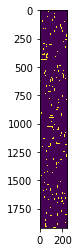

In [100]:
xrange,yrange,xmin,xmax,ymin,ymax,x0=prepare(inp)
world=make_world(xrange,yrange,xmin,xmax,ymin,ymax,x0)
plt.imshow(world)

go(world,0,500-x0)


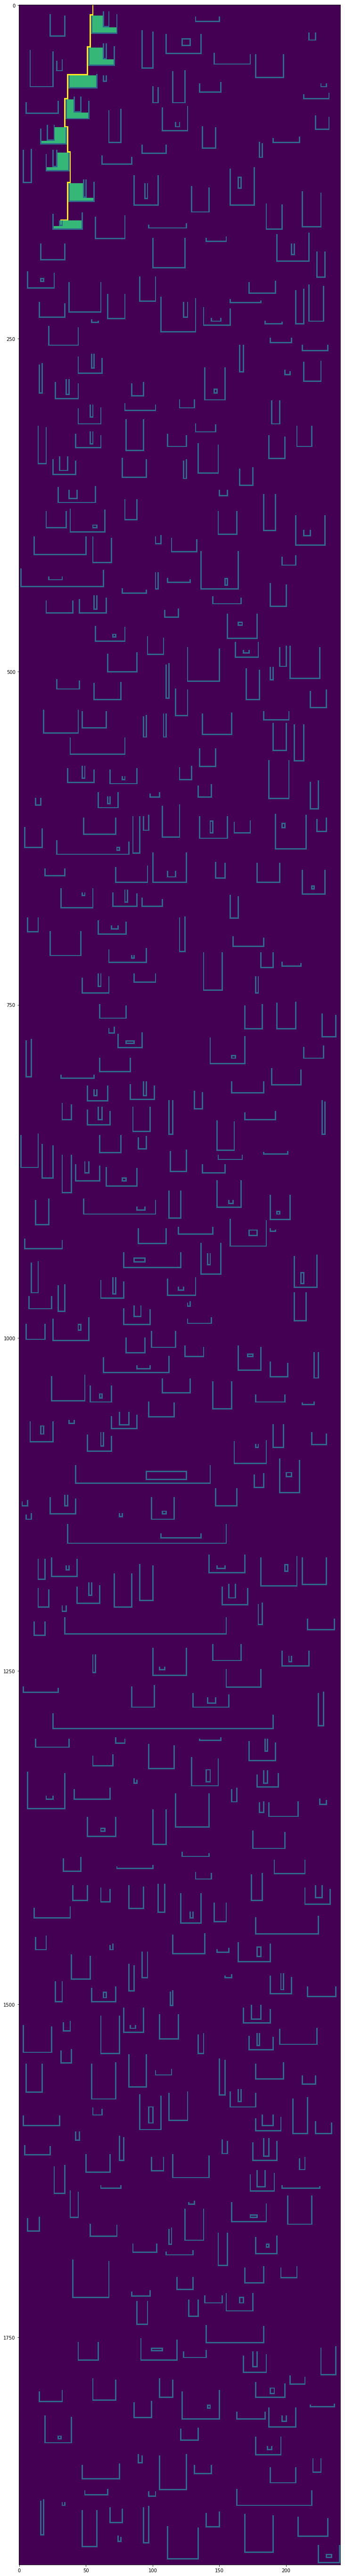

In [101]:
fig,ax=plt.subplots(figsize=(14,100))
ax.imshow(world)

In [33]:
world.shape

(1921, 241)

In [102]:
cnt(world,ymin,ymax)

1272

### Day 18

In [2]:
inp=np.array(list(map(list, readin('18.txt'))))
# inp=np.array(list(map(list, """.#.#...|#.
# .....#|##|
# .|..|...#.
# ..|#.....#
# #.#|||#|#|
# ...#.||...
# .|....|...
# ||...#|.#|
# |.||||..|.
# ...#.|..|.""".splitlines())))

array([['#', '.', '.', ..., '.', '.', '#'],
       ['#', '.', '.', ..., '|', '#', '.'],
       ['.', '#', '.', ..., '#', '.', '.'],
       ...,
       ['.', '.', '|', ..., '|', '.', '.'],
       ['|', '|', '#', ..., '#', '|', '#'],
       ['.', '|', '.', ..., '.', '#', '.']], dtype='<U1')

In [3]:
def cn(y,x,w):
    h=0; v=0
    for yy in range(y-1, y+2):
        for xx in range(x-1, x+2):
            if yy>=0 and yy < w.shape[0] and xx >=0 and xx < w.shape[1] and not (yy==y and xx==x):
                if w[yy][xx]=='#': h+=1
                elif w[yy][xx]=='|': v+=1
    return h,v
                
def run(w: np.ndarray):
    ww = w.copy()
    for y,l in enumerate(w):
        for x,ch in enumerate(l):
            h,v=cn(y,x,w)
            ww[y][x]=w[y][x]
            if w[y][x]=='.' and v>=3:
                ww[y][x]='|'
            elif w[y][x]=='|' and h>=3:
                ww[y][x]='#'
            elif w[y][x]=='#':
                if not (h>=1 and v>=1):
                    ww[y][x]='.'
#            print(y,x,h,v,w[y][x],ww[y][x])
    return ww
def draw(w):
    ww=np.zeros(w.shape)
    for y,l in enumerate(w):
        for x,ch in enumerate(l):
            ww[y][x]=1 if ch=='#' else 2 if ch=='|' else 0
    plt.imshow(ww)
    plt.show()

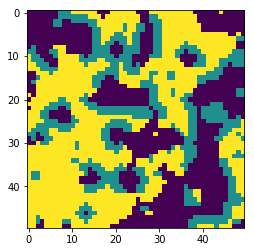

In [4]:
inpw=inp
for i in range(10):
    inpw=run(inpw)
draw(inpw)

In [5]:
def count_res(w):
    res,cnt=np.unique(w,return_counts=True)
    ans={r:c for r,c in zip(res,cnt)}
    return ans['#']*ans['|']

ans=count_res(inpw)

645946

In [20]:
ww={}
inpw=inp
ww[count_res(inpw)]= 0
dups={}
for i in range(700):
    inpw=run(inpw)
    ans=count_res(inpw)
    if ans in ww:
        print(f'Found dup {i+1} with {ww[ans]} - {i+1-ww[ans]} - {ans}')
        dups[i+1]=ww[ans]
    ww[ans]=i+1
# Found dup 505 with 477 - 28

Found dup 52 with 17 - 35 - 121904
Found dup 104 with 62 - 42 - 131490
Found dup 128 with 127 - 1 - 150788
Found dup 226 with 221 - 5 - 179916
Found dup 263 with 143 - 120 - 160136
Found dup 284 with 157 - 127 - 177660
Found dup 310 with 186 - 124 - 199332
Found dup 358 with 218 - 140 - 201705
Found dup 425 with 424 - 1 - 201019
Found dup 438 with 328 - 110 - 205570
Found dup 447 with 419 - 28 - 186548
Found dup 456 with 338 - 118 - 200310
Found dup 471 with 183 - 288 - 210600
Found dup 475 with 451 - 24 - 195132
Found dup 505 with 477 - 28 - 194638
Found dup 506 with 478 - 28 - 197736
Found dup 507 with 479 - 28 - 198996
Found dup 508 with 480 - 28 - 199908
Found dup 509 with 481 - 28 - 201142
Found dup 510 with 482 - 28 - 204227
Found dup 511 with 483 - 28 - 204558
Found dup 512 with 484 - 28 - 207080
Found dup 513 with 485 - 28 - 208705
Found dup 514 with 486 - 28 - 210625
Found dup 515 with 487 - 28 - 210420
Found dup 516 with 488 - 28 - 213658
Found dup 517 with 489 - 28 - 217558


In [18]:
505+(1000000000-505)%28

524

In [22]:
505+(572-505)%28

516

### Day 19

#### run day 16 first

In [3]:
inpt=readin('19.txt')
# inpt="""#ip 0
# seti 5 0 1
# seti 6 0 2
# addi 0 1 0
# addr 1 2 3
# setr 1 0 0
# seti 8 0 4
# seti 9 0 5""".splitlines()

['#ip 4',
 'addi 4 16 4',
 'seti 1 3 3',
 'seti 1 4 2',
 'mulr 3 2 1',
 'eqrr 1 5 1',
 'addr 1 4 4',
 'addi 4 1 4',
 'addr 3 0 0',
 'addi 2 1 2',
 'gtrr 2 5 1',
 'addr 4 1 4',
 'seti 2 2 4',
 'addi 3 1 3',
 'gtrr 3 5 1',
 'addr 1 4 4',
 'seti 1 6 4',
 'mulr 4 4 4',
 'addi 5 2 5',
 'mulr 5 5 5',
 'mulr 4 5 5',
 'muli 5 11 5',
 'addi 1 4 1',
 'mulr 1 4 1',
 'addi 1 15 1',
 'addr 5 1 5',
 'addr 4 0 4',
 'seti 0 9 4',
 'setr 4 2 1',
 'mulr 1 4 1',
 'addr 4 1 1',
 'mulr 4 1 1',
 'muli 1 14 1',
 'mulr 1 4 1',
 'addr 5 1 5',
 'seti 0 8 0',
 'seti 0 4 4']

In [4]:
allinstsmap={i.__name__: i for i in allinsts}
def run(inst, rs):
    ii=inst.split(' ')
    if ii[0]=='#ip':
        rs[-1]=int(ii[1])
    else:
        allinstsmap[ii[0]](*[int(i) for i in ii[1:]], rs)

In [24]:
def run_with_ip(insts, rs, max_iteration=10000000):
    ans=[]
    run(insts[0],rs)  # set ip
    insts = insts[1:]
    while len(ans)<max_iteration and rs[-2]>=0 and rs[-2]<len(insts):
        ip=rs[rs[-1]]=rs[-2]
        rsbefore=rs.copy()
        run(insts[ip],rs)
        #print(rsbefore,insts[ip],rs)
#        ans.append(rsbefore)
        rs[-2]=rs[rs[-1]]
        rs[-2]+=1
    return ans

In [25]:
rs=np.zeros(8,np.int64)  # [-1] is register# for ip, [-2] is ip
ans=run_with_ip(inpt,rs);
# regiter 0 never changes; loop ip 3,4,5,6,8,9,10,11
addi 4 16 4
seti 1 3 3
seti 1 4 2

mulr 3 2 1  r1=r3*r2
eqrr 1 5 1  r1=1 if r1=r5 else 0
addr 1 4 4  r[4]=r[1]+r[4]
addi 4 1 4  r[4]=r[4]+1
#addr 3 0 0 
addi 2 1 2 r[2]=r[2]+1
gtrr 2 5 1 r[1]=1 if r[2]>r[5] else 0
addr 4 1 4 r[4]=r[4]+r[1]
seti 2 2 4 r[4]=r[2]+2

addi 3 1 3
gtrr 3 5 1
addr 1 4 4
seti 1 6 4
mulr 4 4 4
addi 5 2 5
mulr 5 5 5
mulr 4 5 5
muli 5 11 5
addi 1 4 1
mulr 1 4 1
addi 1 15 1
addr 5 1 5


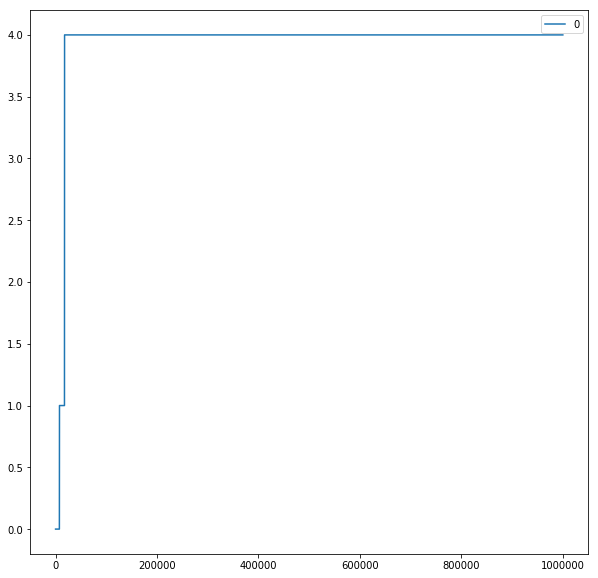

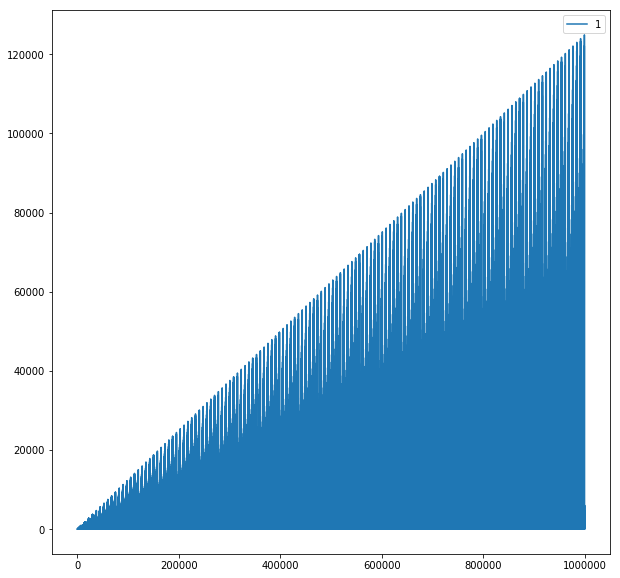

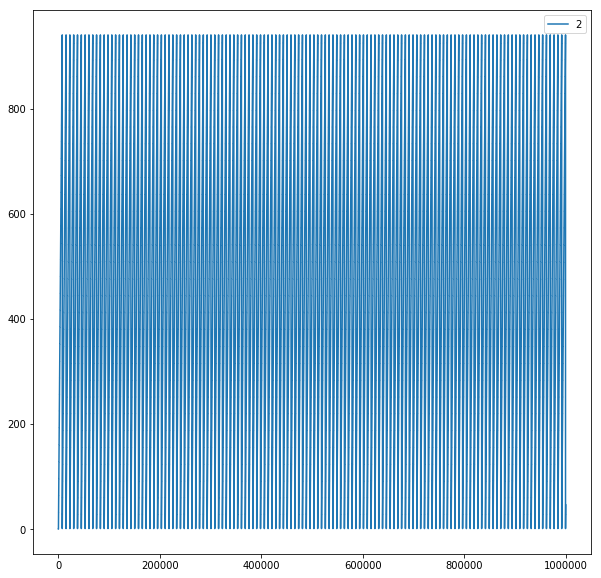

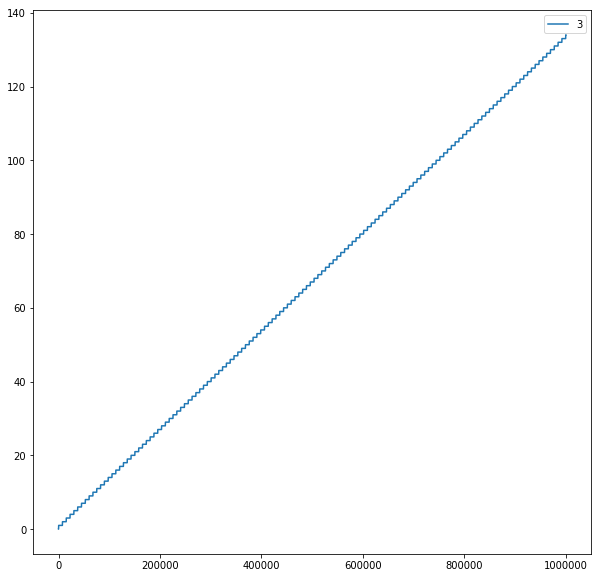

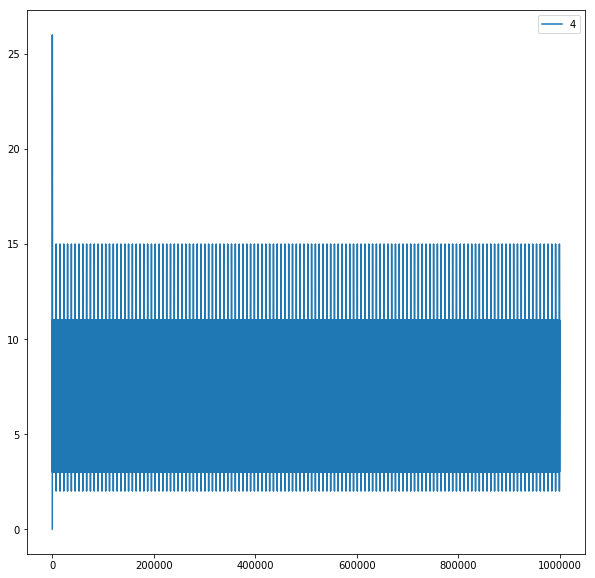

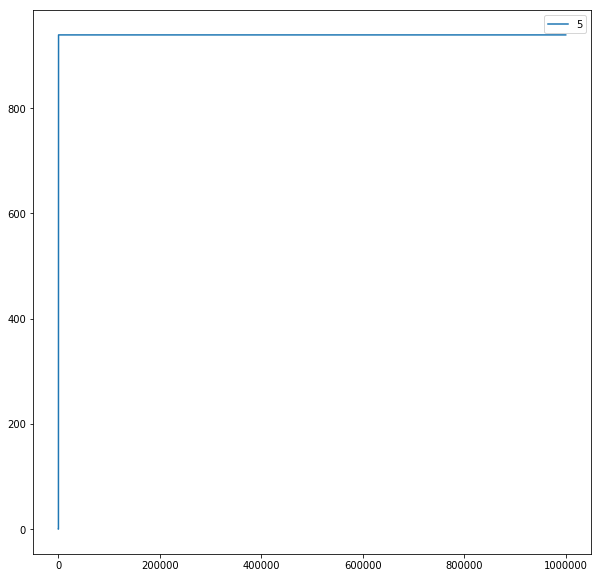

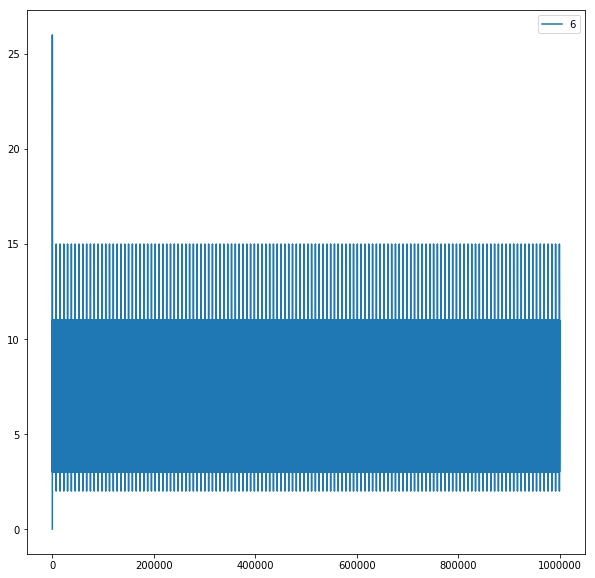

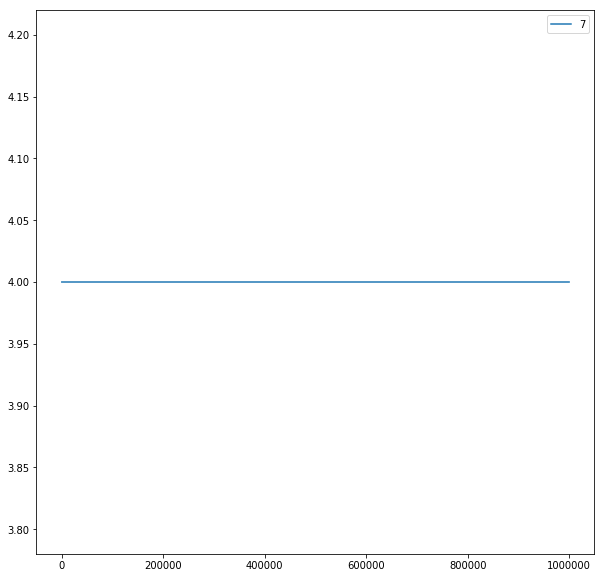

In [22]:
for i in range(8):
    plt.figure(figsize=(10,10))
    #if i == 1 or i == 2 or i == 3: continue
    plt.plot([r[i] for r in ans], label=i)
    plt.legend()
    plt.show()

In [26]:
rs

array([1256,    1,  940,  940,  256,  939,  257,    4])

### Day 20

In [172]:
inp=readin('20.txt')[0]
#inp='^ENWWW(NEEE|SSE(EE|N))$'
# inp='^ENNWSWW(NEWS|)SSSEEN(WNSE|)EE(SWEN|)NNN$'
# inp='^ESSWWN(E|NNENN(EESS(WNSE|)SSS|WWWSSSSE(SW|NNNE)))$'
#inp='^WSSEESWWWNW(S|NENNEEEENN(ESSSSW(NWSW|SSEN)|WSWWN(E|WWS(E|SS))))$'

'^ESWSSSSSWSWWNNNENNWWNWWSWNNNESEENEESE(NENWNEENNWNEEESESWSESENEENNNNWWW(NNWSSWNWSWNWWSESSS(E|WWNENWWSWWWNWNWSSESESS(WWN(WN(WSWNWWWWWNNWSSWNNNWSSSWWSESWSSSENNESESWSSSWWNWWSWSEE(SSSSWNWNN(ESNW|)WNNNNNEEE(NNWSWNNEENWNENNWWNWSWWSWNWWWSSSESENN(NWSNES|)EEENEE(E|SWS(WSESWWSWWN(ENENWESWSW|)WSSEEEE(NEWS|)SWWWSEEESSSSESSWSSWSWNWNEENWWNWWSSWNWSSWSEEEE(ESWSWSEENESSESENNWNN(ESEEENENWWW(SEWN|)(NNE(N|SEEN(W|EENEESENNESSSSESSSWSEENNENWNENWWNEENESSENENNESSEESESEEEEESSENEENENWWSWNWWWWNNWNNWNNWSSW(WWNWSWNNNENNWWNENNWWWSWNW(SSESEE(SWSESWSEE(NNNEWSSS|)SS(EESNWW|)WSWNN(E|WWWNN(EE(SWEN|)NNWSWNNE(WSSENEWSWNNE|)|WWWSSES(WSNE|)E(NNWESS|)E))|N(NEWS|)W)|NEN(WWS(WNSE|)S|ESENESE(N|ESESS(WNSE|)SENNN(NWES|)EESWSESSS(EEESWSESSE(EESWWSEEENEN(W|EN(W|NNENESSWSSSWS(W|EENESENNESSSENEEEEESESENNENEENNESESENESSSSWWWNN(ESENSWNW|)(WWSWSSSWWN(WWN(NWSSSESSEEESWWWWNWWNNWWSESSSWNNWNNWNW(SSESSSSE(NN|SWSSSESESESWWNWSSSESENN(W|ESESEENEENNWNENNEESSSSEENWNNNENNWWS(WWWWSESWSSS(E|W(NW(S|NENWWNWNENW(WSNE|)NEEN(NE(NWES|)SEESWS(W(SSWNNSSENN

In [173]:
def trace(path, i, edges, nodes, curnode, nodefrom):
    #print(locals())
    if i >= len(path):
        return w
    while i < len(path):
        ch=path[i]
        y,x=curnode
        if ch=='N':
            ny, nx = y-1,x
        elif ch == 'S':
            ny, nx = y+1, x
        elif ch == 'E':
            ny, nx = y, x+1
        elif ch == 'W':
            ny, nx = y, x-1
        elif ch == '(':
            i = trace(path, i+1, edges, nodes, curnode, nodefrom)
            while i < len(path) and path[i]=='|':
                i = trace(path, i+1, edges, nodes, curnode, nodefrom)
            i+=1
            continue
        elif ch == ')':
            return i
        elif ch == '|':
            return i

        nodeto = nodes.get((ny,nx), len(nodes))
        nodes[(ny,nx)]=nodeto
        
        edgeto = edges.get(nodefrom, [])
        edgeto.append(nodeto)
        edges[nodefrom]=edgeto
        
        edgefrom = edges.get(nodeto, [])
        edgefrom.append(nodefrom)
        edges[nodeto]=edgefrom
        #print(i,ch,edges,nodes)
        #draw(edges,nodes)
        i+=1

        curnode=ny,nx
        nodefrom=nodeto
    return i

nodes={(0,0):0}
edges={}
trace(inp[:-1], 1, edges, nodes, (0,0), 0)

14098

In [174]:
edges, nodes

({0: [1],
  1: [0, 2],
  2: [1, 3],
  3: [2, 4],
  4: [3, 5],
  5: [4, 6],
  6: [5, 7],
  7: [6, 8],
  8: [7, 9],
  9: [8, 10],
  10: [9, 11],
  11: [10, 12],
  12: [11, 13],
  13: [12, 14],
  14: [13, 15],
  15: [14, 16],
  16: [15, 17],
  17: [16, 18],
  18: [17, 19],
  19: [18, 20],
  20: [19, 21],
  21: [20, 22],
  22: [21, 23],
  23: [22, 24],
  24: [23, 25],
  25: [24, 26],
  26: [25, 27],
  27: [26, 28],
  28: [27, 29],
  29: [28, 30],
  30: [29, 31],
  31: [30, 32],
  32: [31, 33],
  33: [32, 34],
  34: [33, 35],
  35: [34, 36],
  36: [35, 37],
  37: [36, 38, 9990],
  38: [37, 39],
  39: [38, 40],
  40: [39, 41],
  41: [40, 42],
  42: [41, 43],
  43: [42, 44],
  44: [43, 45],
  45: [44, 46],
  46: [45, 47],
  47: [46, 48],
  48: [47, 49],
  49: [48, 50],
  50: [49, 51],
  51: [50, 52],
  52: [51, 53],
  53: [52, 54],
  54: [53, 55],
  55: [54, 56],
  56: [55, 57],
  57: [56, 58],
  58: [57, 59],
  59: [58, 60],
  60: [59, 61],
  61: [60, 62],
  62: [61, 63],
  63: [62, 64],
  6

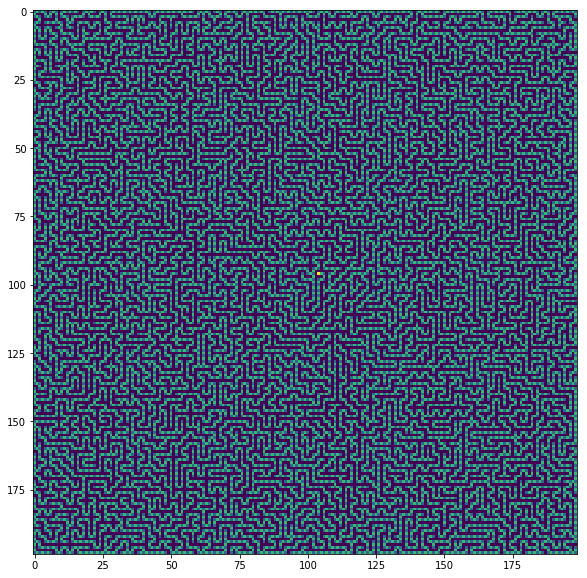

In [175]:
def draw(edges, nodes):
    nomap={v:k for k,v in nodes.items()}
    nodes=np.array(list(nodes.keys()))
    xmin,xmax=nodes[:,1].min(), nodes[:,1].max()
    ymin,ymax=nodes[:,0].min(), nodes[:,0].max()
    w=np.zeros((2*(ymax-ymin+1)-1,2*(xmax-xmin+1)-1),np.int8)
    #print(xmin,ymin,xmax,ymax)
    for y,x in nodes:
        w[2*(-ymin+y),2*(-xmin+x)]=1
    w[-ymin*2][-xmin*2]=3
    for nfrom, ntos in edges.items():
        yfrom,xfrom=nodes[nfrom]
        for nto in ntos:
            yto,xto=nodes[nto]
            if xfrom==xto:
                w[2*(-ymin+min(yfrom,yto))+1, 2*(-xmin+xfrom)]=2
            else:
                w[2*(-ymin+yfrom), 2*(-xmin+min(xfrom,xto))+1]=2
    #w=np.flipud(w
    #print(w)
    plt.figure(figsize=(10,10))
    plt.imshow(w)
    plt.show()
draw(edges, nodes)

In [176]:
def bfs(edges, nodes, curnode):
    alldist={}
    nomap={v:k for k,v in nodes.items()}
    q = queue.Queue()
    q.put((curnode,0))
    while not q.empty():
        cn,dist=q.get()
        if cn in alldist:
            continue
        alldist[cn]=dist
        for nn in edges[cn]:
            q.put((nn, dist+1))
    return alldist
dists=bfs(edges,nodes,0)

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 9990: 38,
 39: 39,
 9991: 39,
 9994: 39,
 40: 40,
 9992: 40,
 9995: 40,
 41: 41,
 9993: 41,
 9996: 41,
 42: 42,
 9997: 42,
 43: 43,
 9998: 43,
 44: 44,
 9999: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 9983: 70,
 71: 71,
 9984: 71,
 72: 72,
 9985: 72,
 73: 73,
 9986: 73,
 74: 74,
 9987: 74,
 75: 75,
 9988: 75,
 76: 76,
 9989: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 88,
 90: 89,
 91: 90,
 92: 

In [177]:
max(dists.values())

3218

In [179]:
### Part 2
len([1 for _,v in dists.items() if v>=1000])

8725